GC content of cryptosporidium hominis

parse supplied fasta file
generate distribution of gene lengths
decide how best to segment these sequences (quartiles)
compute GC content for each
plot the resulting distributions against each other (boxplot)
test whether the two distribs reflect statistical difference (t-test)


In [3]:
!head -30 ChTU502new_nuc.fasta

>ChTU502new_422g0005 Maspardin
ATGGTAAGAAGACTCTCAAGTGAATTTGGAGATTTTATCGAATCTTACCCTTTAAAAAGA
ACTACTATACCTTATTTAGATGGAATATGGACTTGGATTGATTGTAATCCAAAAAATGTG
GAAAAAATTAGTAAAATAGTTTCTCAAGAAAGTATTACAGATATTGAAGATATTACCGAA
GATTACTATTCAAGAAAAACTGTTAAACAATTATCTATTAAAGATCAAGATAAGCTTAGT
AAATTAAATAGTGCTTCATTACAATATAATAATAATGATGAAAAATACGAATCTAATGAA
TTTGATACAATTGTTATACTTCATGGTTTATCAGGCACTGCTGGTGAATACTTTATGTTT
ATGAAGAATATGTTAAAATGCGGATATAGAATAATTTCTGTACAATATCCAATATATGAT
GATATTAATGATTGGATTAAATCATTTTCTCTTTTTTTAGATCAACTTGAATTGGATTCA
ATACATTTATATGGAAGTGATTTAGGTGGTTATTTAAGTATAATGTTTTCACAAGAATTT
CCTAATCGAGTAAAATCATTAATTTTGTGTAATGCTTTTGTATCAACATTAAATTTACCA
TTACCATCAATAGCTTCAACATTTTTATATTTTTGTCCACAATTTATTCTTGTAAAGTTA
ATTTCTGAAATTTTCAAAAATAGAGAAATATTATATTCACCAATAGAAGATATGGGATTT
TATTCAACAGTAACAAATATTCATAAAGATAATAATTTATATGATAAATTATATAATCAA
TCACTAAATTTTGTGATTGGACAATTATATTCACTTTCAAATCATGATTTGGCTTCTAGA
TTAAGTTTTGTATTATCAGGTGATGAAACATTATCAATATTAAATTTGACAAAATTTTCA
AGTATATTAGATAATAAAAGAATTACATTTATTTCAAGTCCTGATAATTCTTTT

In [12]:
name = None
seqdict = {}

with open('ChTU502new_nuc.fasta', 'r') as in_file:
    for line in in_file:
        line = line.rstrip()
        if line[0] == '>':
            name = line.split(' ')[0][1:]
            seqdict[name] = ''
        else:
            seqdict[name] = seqdict[name] + line

print(list(seqdict.items())[0:5])
type(seqdict) #thanks guiseppe

[('ChTU502new_422g0005', 'ATGGTAAGAAGACTCTCAAGTGAATTTGGAGATTTTATCGAATCTTACCCTTTAAAAAGAACTACTATACCTTATTTAGATGGAATATGGACTTGGATTGATTGTAATCCAAAAAATGTGGAAAAAATTAGTAAAATAGTTTCTCAAGAAAGTATTACAGATATTGAAGATATTACCGAAGATTACTATTCAAGAAAAACTGTTAAACAATTATCTATTAAAGATCAAGATAAGCTTAGTAAATTAAATAGTGCTTCATTACAATATAATAATAATGATGAAAAATACGAATCTAATGAATTTGATACAATTGTTATACTTCATGGTTTATCAGGCACTGCTGGTGAATACTTTATGTTTATGAAGAATATGTTAAAATGCGGATATAGAATAATTTCTGTACAATATCCAATATATGATGATATTAATGATTGGATTAAATCATTTTCTCTTTTTTTAGATCAACTTGAATTGGATTCAATACATTTATATGGAAGTGATTTAGGTGGTTATTTAAGTATAATGTTTTCACAAGAATTTCCTAATCGAGTAAAATCATTAATTTTGTGTAATGCTTTTGTATCAACATTAAATTTACCATTACCATCAATAGCTTCAACATTTTTATATTTTTGTCCACAATTTATTCTTGTAAAGTTAATTTCTGAAATTTTCAAAAATAGAGAAATATTATATTCACCAATAGAAGATATGGGATTTTATTCAACAGTAACAAATATTCATAAAGATAATAATTTATATGATAAATTATATAATCAATCACTAAATTTTGTGATTGGACAATTATATTCACTTTCAAATCATGATTTGGCTTCTAGATTAAGTTTTGTATTATCAGGTGATGAAACATTATCAATATTAAATTTGACAAAATTTTCAAGTATATTAGATAATAAAAGAATTACATTTATTTCAAGTCCTGATAATTCTTTTGATGATCATAATTTCGTTAA

dict

In [13]:
print(f'There are {len(seqdict)} transcripts')

There are 3745 transcripts


In [90]:
gene_length = {}     # does the same except makes a new dictionary which
for gene in seqdict:                   # maps each gene name to it's length
    this_length = len(seqdict[gene])
    gene_length[gene] = this_length 
    
print(list(gene_length.items())[0:5])
print(len(gene_length)) #matches no of previous transcripts

lengths = []

# fill up list with gene lengths          
          
for gene in seqdict:
    this_length = len(seqdict[gene])   #  this uses the gene key to get the DNA sequence
    lengths.append(this_length)     #  & then calculate it's length, adds to list `lengths`

[('ChTU502new_422g0005', 1281), ('ChTU502new_422g0010', 4323), ('ChTU502new_422g0015', 471), ('ChTU502new_422g0020', 3570), ('ChTU502new_422g0025', 1080)]
3745


In [33]:
print('First 10 elements are:',lengths[0:10])
print('Total number of entries',len(lengths))

First 10 elements are: [1281, 4323, 471, 3570, 1080, 2277, 5145, 2394, 3450, 1275]
Total number of entries 3745


In [27]:
import matplotlib.pyplot as plt

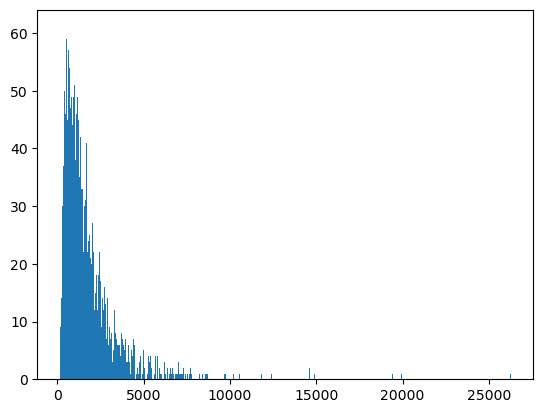

In [35]:
plt.hist(lengths, bins = 1000)
plt.show()

In [38]:
from statistics import mean,stdev

print(int(mean(lengths)))

1846


In [99]:
import pandas as pd
names = []
for keys, value in gene_length.items():
    names.append(keys) #generates a list of names to match the list of lengths from earlier
    
lengths_df = pd.DataFrame({'Names':names, 'Length':lengths})

import numpy as np
print('Quantile boundaries')
print("10%:",np.quantile(lengths_df['Length'], .10))
print("90%:",np.quantile(lengths_df['Length'], .90))


Quantile boundaries
10%: 505.2000000000001
90%: 3703.7999999999997


In [100]:
#Want a group of long transcripts and short transcripts
#Will experiment to get ~roughly~ 20% of pop, 10pc short and 10pc long
#aiming for ~180 per group

count = 0
threshold = 505
for this_length in lengths:
   if this_length < threshold:
      count = count + 1
print (count)       #194 have a length less than 400

375


In [104]:
count = 0
threshold = 3704
for this_length in lengths:
   if this_length > threshold:
      count = count + 1
print (count) #179 have a length greater than 5000      

375


In [101]:

long_seqs = []   #  dummy list to hold these sequences
          
for gene in seqdict:
    this_length = len(seqdict[gene])
    if this_length > 3704:
        long_seqs.append(seqdict[gene])
print (len(long_seqs))

375


In [105]:

short_seqs = []   #  dummy list to hold these sequences
          
for gene in seqdict:
    this_length = len(seqdict[gene])
    if this_length < 505:
        short_seqs.append(seqdict[gene])
print (len(short_seqs))

print(short_seqs[30])    #    this is an example of a short gene

375
ATGGATGGCGCAACCTCATCAGGTAAAATAGGTGGTAAAGTTGGTGGCAAGGTTGGTGGAAAAGGAAAAGCAGGTTCTGGTAAGGGAAGTAAGAAGCAACCGACTTCCAGAGCAGCTCGTGCAGGGCTTCAGTTTCCAGTCGGCCGTATTCAACGTATGCTAAAGCATCGTATTCCAGGAGATTGTCGTGTAGGTTCAACTGCCTCTGTTTACGCAGCTGCAATTTTGGAATACTTGACCGCTGAAGTACTCGAATTGGCTGGTAATGCTTCAAAGGATCTTAAAGTCAAGCGTATTACGCCTAGACATCTTCAACTTGCCATTAGAGGTGACGAAGAGCTGGATTCCCTTATTAAGGCCACAATTGCAGGTGGTGGTGTAATACCTCACATAGAAAAGTCTCTTATGGGTAAGGCTTTAATAGGGAAAAAAGGTAAAAAGGGTAATATGAGTCCATGA


In [135]:
def gc_percent(sequence):
    g = sequence.count('G')
    c = sequence.count('C')
    ratio = (g + c)/(len(sequence))
    return(ratio)
long_seq_gc = []

for sequence in long_seqs:                    #  this loops over all the sequences, finds the
    long_seq_gc.append(gc_percent(sequence)*100)  # GC% of the current one, adds it to a list


print('Long transcripts GC% mean/min/max values',round(mean(long_seq_gc),2),round(min(long_seq_gc),2),round(max(long_seq_gc),2))    
print('Long transcripts mean/stdev values',round(mean(long_seq_gc),2),round(stdev(long_seq_gc),2))

Long transcripts GC% mean/min/max values 31.05 20.22 42.76
Long transcripts mean/stdev values 31.05 4.02


In [136]:
short_seq_gc = []

for sequence in short_seqs:                    #  this loops over all the sequences, finds the
    short_seq_gc.append(gc_percent(sequence)*100)  # GC% of the current one, adds it to a list

    
print('Short transcripts GC% mean/min/max values',round(mean(short_seq_gc),2), round(min(short_seq_gc),2), round(max(short_seq_gc),2))
print('Short transcripts GC% mean/stdev values', round(mean(short_seq_gc),2),round(stdev(short_seq_gc),2))


Short transcripts GC% mean/min/max values 34.87 23.53 49.11
Short transcripts GC% mean/stdev values 34.87 4.97


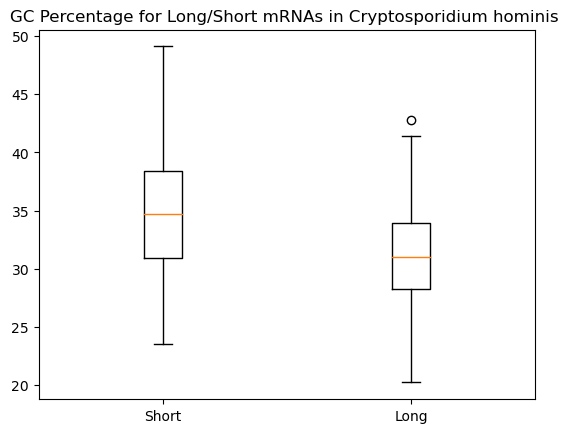

In [137]:
data = [short_seq_gc,long_seq_gc]
data_names = ['Short', 'Long']
fig1, ax1 = plt.subplots()
ax1.set_title('GC Percentage for Long/Short mRNAs in Cryptosporidium hominis ')
ax1.boxplot(data)
ax1.set_xticklabels(data_names, fontsize=10)
plt.show();

In [138]:
print('Mean (GC%) in long seqs',np.mean(long_seq_gc))
print('Variance (GC%) in long seqs',np.var(long_seq_gc))
print('Mean (GC%) in short seqs',np.mean(short_seq_gc))
print('Variance (GC%) in short seqs',np.var(short_seq_gc))

Mean (GC%) in long seqs 31.045028441769837
Variance (GC%) in long seqs 16.115295745599642
Mean (GC%) in short seqs 34.8743826805837
Variance (GC%) in short seqs 24.587788447698674


In [139]:
from scipy import stats
tst = stats.ttest_ind(short_seq_gc,long_seq_gc, equal_var=False)
print ('T test to determine if long & short GC% are drawn from the same distribution')
print ('Note: unequal variances')
print (' pvalue: ',tst.pvalue)

T test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
 pvalue:  1.1483714837081187e-28
